# PageRank

This notebook illustrates the ranking of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

**Ranking**

In [5]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)

In [6]:
image = svg_graph(adjacency, position, scores=np.log(scores))

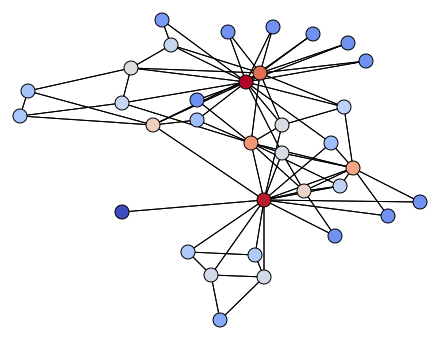

In [7]:
SVG(image)

**Ranking with personalization**

In [8]:
seeds = {1: 1, 10: 1}

In [9]:
scores = pagerank.fit_transform(adjacency, seeds)

In [10]:
image = svg_graph(adjacency, position, scores=np.log(scores), seeds=seeds)

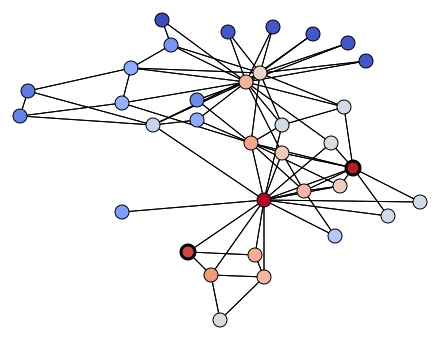

In [11]:
SVG(image)

## Digraphs

In [12]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

**Ranking**

In [13]:
pagerank = PageRank()
scores = pagerank.fit_transform(adjacency)

In [14]:
image = svg_digraph(adjacency, position, scores=np.log(scores), names=names)

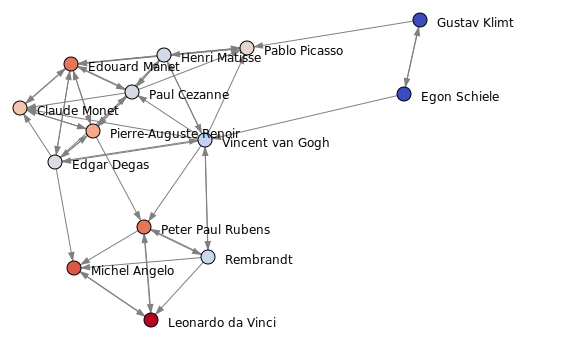

In [15]:
SVG(image)

**Ranking with personalization**

In [16]:
cezanne = 11
seeds = {cezanne:1}

In [17]:
scores = pagerank.fit_transform(adjacency, seeds)

In [18]:
image = svg_digraph(adjacency, position, names, scores=np.log(scores + 1e-6), seeds=seeds)

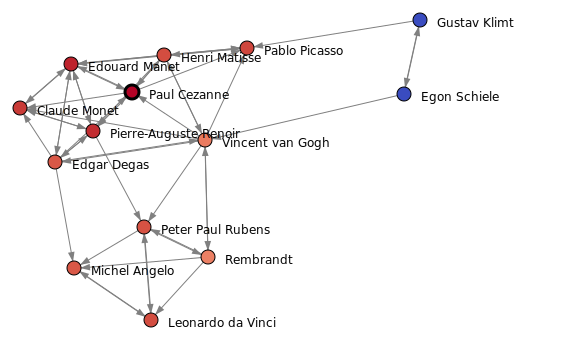

In [19]:
SVG(image)

## Bigraphs

In [20]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Ranking**

In [21]:
bipagerank = BiPageRank()

In [22]:
drive = 3
aviator = 9
seeds_row={drive: 1, aviator: 1}

In [23]:
bipagerank.fit(biadjacency, seeds_row)
scores_row = bipagerank.scores_row_
scores_col = bipagerank.scores_col_

In [24]:
image = svg_bigraph(biadjacency, names_row, names_col,
                    scores_row=np.log(scores_row), scores_col=np.log(scores_col), seeds_row=seeds_row)

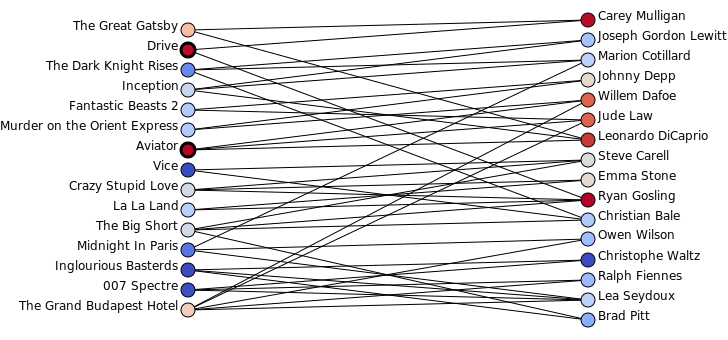

In [25]:
SVG(image)